# Lab 5 - Exploratory Data Analysis

In [1]:
% matplotlib inline

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  
* Post Self Evaluation and Lab to Lab Group on Blackboard and Lab to Module on Blackboard on Monday.

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Blackboard submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)


2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. You *must* follow the framework discussed in the Module for a *methodical* EDA:

1. Single Variable Exploration.
2. Exploration of Pairwise Relationships.

Each and every analysis (of a single variable or a pair of variables) should follow the general pattern of discuss/code/discuss. If you need examples for EDA, look at the Example in *Fundamentals*. 

In order to guide the EDA, you can take the following as the main question:

> What are the factors influencing charges?

Using that problem as a guide, explore 5 pairwise relationships. Because you have a question, you should *not* use correlations as a *guide* to exploration (however, correlation coefficients are still reasonable descriptive statistics for two numeric variables).

As you explore those pairings, questions will arise, "I wonder if...." or "I wonder about...". Make note of them. **Do not get distracted**. As a rough guide, you should get three (3) questions out of every single or pairwise exploration. As a result, you should have at least 15 of them when you're done (plus all the questions you generated looking at each variable individually!).

Pick five (5) of *those* questions and answer them.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. 

The emphasis here is on *science*.

At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

BTW, do not literally say "Why am I doing this?"...these questions are just *prompts* or *scaffolding*.

For now, you shouldn't just "change" anything. Let's say you start with 10 bins in your histogram. You decide you want to see what happens with 20. **Do not just change the value to 20**. Instead, make a new histogram with 20 bins, documenting why you thought 20 bins might be better, what you hoped to see, and then what you saw as a result of doing it.

(Believe me, there will be a time when a boss says "did you try 10 bins?" and you'll say "yes" but you won't remember what it looked like or they'll want to see it and you'll have to do it all again anyway. Your notebook is a documentation of *everything* you tried.)

Be inventive and creative.

In [1]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import eda
import statsmodels.api as sm

sns.set(style="whitegrid")

# Answer

Use this link to get the data:

```
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv")
```

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## Single Variables

We start with the single variable EDA of all the features provided in the data.

### age

`age` a numeric variable is the age of the person getting insured. I expect to get decreasing values for higher ages as there are less people in ages >60 than other ages.

In [4]:
pd.DataFrame(data["age"].value_counts().sort_index())

,age
18,69
19,68
20,29
21,28
22,28
23,28
24,28
25,28
26,28
27,28


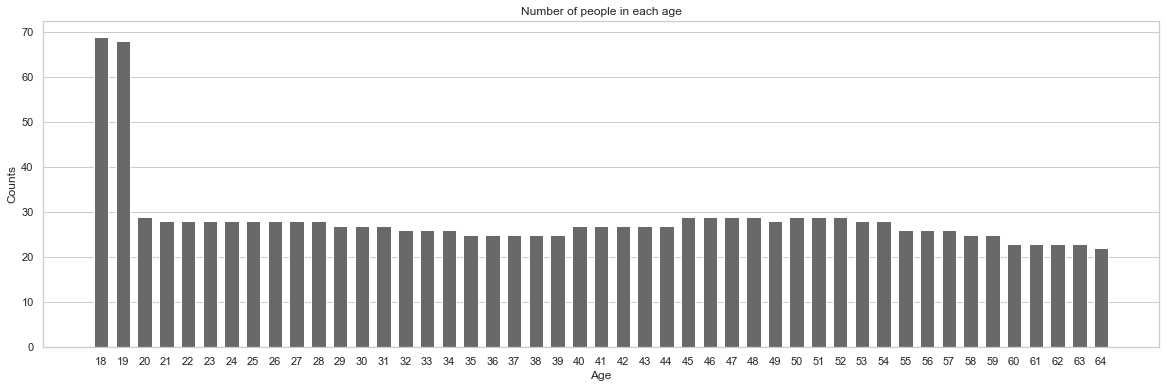

In [5]:
counts = data["age"].value_counts().sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Number of people in each age")
axes.set_xlabel("Age")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

plt.show()
plt.close()

There is an unusually large number of 18 and 19 year olds. There is more than twice as many 18 or 19 year olds individually as any other other age individually. We do however see the expectation I had that the counts would decrease with ages >60

### sex

`sex` is a categorical variable that is the gender of the person getting insured. I expect there to be a relatively equal amount of males and females in the dataset

In [6]:
pd.DataFrame(data["sex"].value_counts())

,sex
male,676
female,662


There are 676 males in the dataset and 662 females which is relatively the same.

### bmi

`bmi` is a numerical variable that is the body mass index of the person being insured.\
BMI can also be a categorical variable. According to the National Institute of Health (NIH) :"Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women." and the scale for it is:

BMI Categories:\
Underweight = <18.5 \
Normal weight = 18.5–24.9\
Overweight = 25–29.9\
Obesity = BMI of 30 or greater

https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm

In [7]:
data["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

33.0

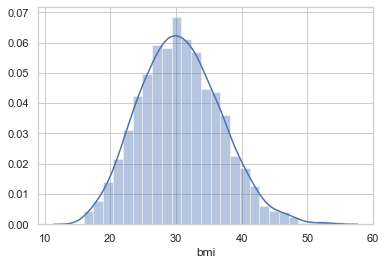

In [8]:
sns.distplot(data["bmi"])
data["bmi"][2]

More than 50% of the dataset fit into the category of "obesity" by the scale of the NIH

### children

`children` is a numerical variable that is the number of children a given insured person has.

In [9]:
data["children"].value_counts().sort_index()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

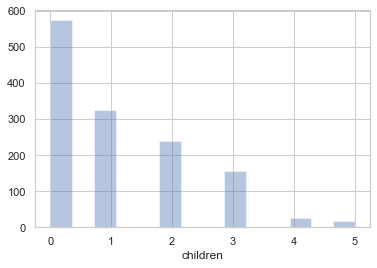

In [10]:
sns.distplot(data["children"],kde=False)

574 people have no children, 324 people have 1 child, 240 people have 2 children, 157 people have 3 children, 25 people have 4 children, and 18 people have 5 children.

### smoker

`smoker` is a binary categorical variable that is "yes" if the insured person smokes and "no" if he/she does not.

In [11]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are 1064 non-smokers and 274 smokers

### region

`region` is a categorical variable that is the region the insured person is from.

In [12]:
data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

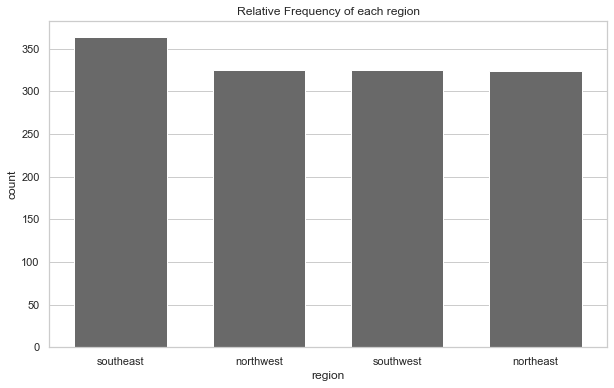

In [13]:
regionlabels = ['southeast', 'southwest', 'northwest', 'northeast']
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.set_xlabel("region")
axes.bar(regionlabels, data["region"].value_counts(), width, color="dimgray", align="center")
axes.set_xticks(regionlabels)
axes.set_xticklabels(data["region"].value_counts().axes[0])
axes.set_title( "Relative Frequency of each region")
axes.set_ylabel( "count")
axes.xaxis.grid(False)

plt.show()
plt.close()

There is about 30 more people from the southeast region than any other region. All of the other regions are fairly even in count.

### charges

`charges` is a numerical variable that is the amount of dollars charged to a person per year in insurance.

In [14]:
data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

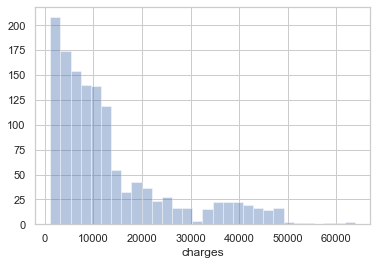

In [15]:
sns.distplot(data["charges"],kde=False);

Most of the charges are under 10000 but there are a few outliers that go up to 63770

Text(0.5, 0, 'log_charges')

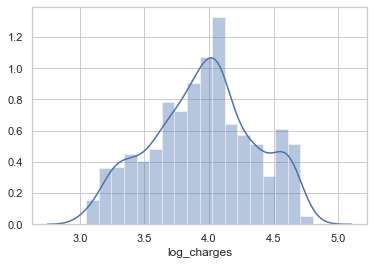

In [16]:
data[ "log_charges"] = data[ "charges"].apply(lambda x: np.log10(x))
ax = sns.distplot(data[ "log_charges"])
ax.set_xlabel('log_charges')

## Pairwise EDA

In [17]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()
    
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
    eda.restyle_boxplot( patch)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()

### age and charges

I expect charges to increase with age as older people are more likely to have health problems making their insurance charges higher

In [18]:
correlation(data, "age", "charges")

Correlation coefficients:
r   = 0.29900819333064765
rho = 0.5343921337718459


In [19]:
describe_by_category(data, "charges", "age")

     count          mean           std          min           25%  \
age                                                                 
18    69.0   7086.217556  10198.459989   1121.87390   1633.044400   
19    68.0   9747.909335  12469.537468   1241.56500   1639.563100   
20    29.0  10159.697736  12049.624794   1391.52870   1967.022700   
21    28.0   4730.464330   6168.059334   1515.34490   1985.288350   
22    28.0  10012.932802  14653.363670   1664.99960   2155.351375   
23    28.0  12419.820040  13421.332226   1815.87590   2432.780150   
24    28.0  10648.015962  12203.650633   1969.61400   2462.839600   
25    28.0   9838.365311  11551.289468   2137.65360   3160.320800   
26    28.0   6133.825309   7765.729490   2302.30000   2921.320525   
27    28.0  12184.701721  11941.821519   2483.73600   3507.332763   
28    28.0   9069.187564  11428.968136   2689.49540   3486.981975   
29    27.0  10430.158727  10680.198133   2866.09100   3945.504250   
30    27.0  12719.110358  12515.21

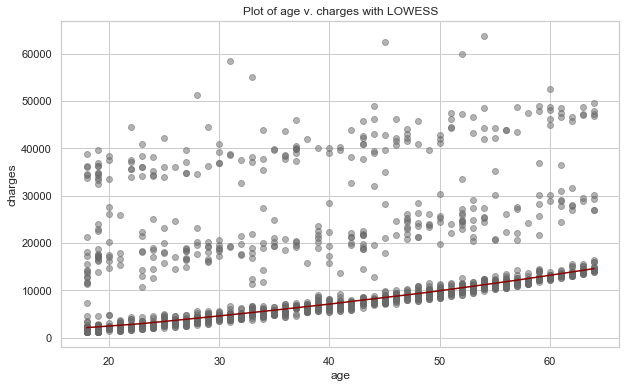

In [20]:
lowess_scatter(data,"age","charges")

Barring any outliers, we can see there is a positive linear trend between age and charges

### sex and charges

I charges between male and female to be relatively the same

In [21]:
describe_by_category(data, "charges", "sex")

        count          mean           std        min        25%         50%  \
sex                                                                           
female  662.0  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male    676.0  13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309  


### bmi and charges

I expect charges to increase with bmi as obese people are more likely to have health problems making their insurance charges higher

In [22]:
correlation(data, "bmi", "charges")

Correlation coefficients:
r   = 0.19834096883362887
rho = 0.11939590358331145


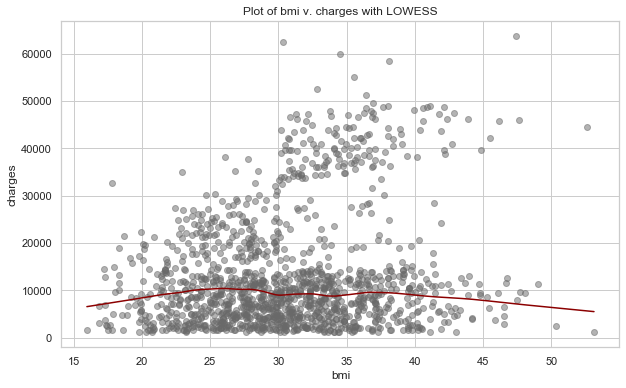

In [23]:
lowess_scatter(data,"bmi","charges")

Although the trendline increases then decreases as BMI increases, we do see that the higher charge amounts >40000 all come from patients with a bmi >30 which is the obesity range

### children and charges

I expect charges to increase with the amount of children due to increased hospital visits

In [24]:
correlation(data, "children", "charges")

Correlation coefficients:
r   = 0.06799822684790482
rho = 0.13333894319168216


In [25]:
describe_by_category(data, "charges","children")

          count          mean           std        min          25%  \
children                                                              
0         574.0  12365.975602  12023.293942  1121.8739  2734.421150   
1         324.0  12731.171832  11823.631451  1711.0268  4791.643175   
2         240.0  15073.563734  12891.368347  2304.0022  6284.939438   
3         157.0  15355.318367  12330.869484  3443.0640  6652.528800   
4          25.0  13850.656311   9139.223321  4504.6624  7512.267000   
5          18.0   8786.035247   3808.435525  4687.7970  5874.973900   

                  50%           75%          max  
children                                          
0          9856.95190  14440.123825  63770.42801  
1          8483.87015  15632.052050  58571.07448  
2          9264.97915  20379.276748  49577.66240  
3         10600.54830  19199.944000  60021.39897  
4         11033.66170  17128.426080  40182.24600  
5          8589.56505  10019.943975  19023.26000  


/Users/reza/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/reza/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/reza/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


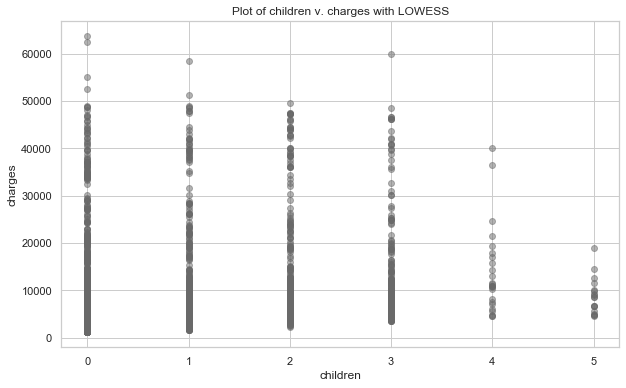

In [26]:
lowess_scatter(data,"children","charges")

Although people with 4-5 children seem to have lower amount of charges than people with less children, that could be due to lack of data as well. According to the correlation coefficient there is no correlation

### smoker and charges

I expect charges to to be significantly higher for people that smoke than people that dont smoke

In [27]:
describe_by_category(data,"charges","smoker")

         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


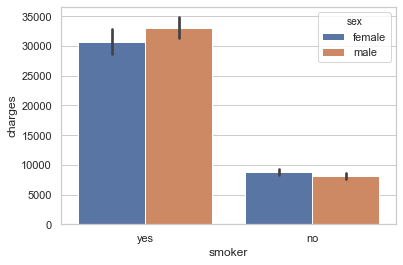

In [31]:
sns.barplot(x="smoker", y="charges", hue = "sex", data=data)

The people that smoke have siginicianly more amoutn of insurance changes than people that dont smoke as shown by the bar plot above

### region and charges

I charges to stay the same across region except for southeast since there are more people from that region in the dataset

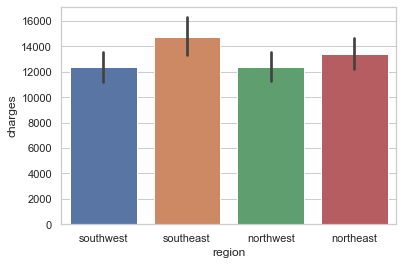

In [29]:
sns.barplot(x="region", y="charges", data=data)

In [30]:
describe_by_category(data, "charges","region")

           count          mean           std        min          25%  \
region                                                                 
northeast  324.0  13406.384516  11255.803066  1694.7964  5194.322288   
northwest  325.0  12417.575374  11072.276928  1621.3402  4719.736550   
southeast  364.0  14735.411438  13971.098589  1121.8739  4440.886200   
southwest  325.0  12346.937377  11557.179101  1241.5650  4751.070000   

                    50%         75%          max  
region                                            
northeast  10057.652025  16687.3641  58571.07448  
northwest   8965.795750  14711.7438  60021.39897  
southeast   9294.131950  19526.2869  63770.42801  
southwest   8798.593000  13462.5200  52590.82939  


The southeast region did have more charges than the rest of the regions but the northeast region unusually had more changes than northwest and southwest.